# Project:-USA-Youtube EDA
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import itertools
import json
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer 
#from wordcloud import WordCloud


plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=14, titlepad=10)

In [2]:
data=pd.read_csv('USvideos.csv')


In [3]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


#### Evaluation of number of views of the videos over time

In [4]:
#first convert treding data into datetime format
#data['trending_date']=data['trending_date'].apply(lambda x: datetime.strptime(x,"%y.%d.%m"))


In [5]:
# first convert trending date to datetime format
data["trending_date"] = pd.to_datetime(data['trending_date'])


ParserError: month must be in 1..12: 17.14.11

In [6]:
data['publish_time']=pd.to_datetime(data['publish_time'])

In [7]:
data["publish_day_week"] = data["publish_time"].dt.dayofweek
data["publish_hour"] = data["publish_time"].dt.hour
data["publish_month"] = data["publish_time"].dt.month

In [8]:
time=data.groupby('trending_date')['views'].sum()

In [9]:
time

trending_date
17.01.12     232922521
17.02.12     216493881
17.03.12     252269204
17.04.12     284933560
17.05.12     315863007
               ...    
18.30.04     817861124
18.30.05    1112807843
18.31.01     284785836
18.31.03     338061606
18.31.05    1145679756
Name: views, Length: 205, dtype: int64

In [10]:
time.rolling(7).mean()

trending_date
17.01.12             NaN
17.02.12             NaN
17.03.12             NaN
17.04.12             NaN
17.05.12             NaN
                ...     
18.30.04    5.794492e+08
18.30.05    7.020189e+08
18.31.01    6.912487e+08
18.31.03    6.218386e+08
18.31.05    6.121591e+08
Name: views, Length: 205, dtype: float64

Text(0, 0.5, 'Total Views')

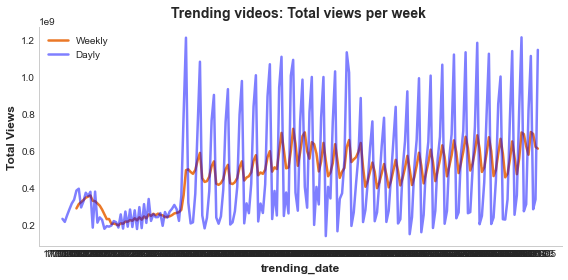

In [11]:
# let,s plot using rolling (7 -> week)
plt.figure(figsize=(8,4))
sns.lineplot(data=time.rolling(7).mean(), linewidth=2.5,color="#EB7827",label="Weekly")
sns.lineplot(data=time, linewidth=2.5,color="blue",alpha=0.5,label="Dayly")
# using plt.grid and sns.despine you get a cleaner look in the graphics
plt.grid(None)
sns.despine()
plt.title("Trending videos: Total views per week ")
plt.ylabel("Total Views")

#### Total videos per Year

In [12]:
year=time.reset_index()

In [13]:
year.head()

,trending_date,views
0,17.01.12,232922521
1,17.02.12,216493881
2,17.03.12,252269204
3,17.04.12,284933560
4,17.05.12,315863007


In [14]:
year['trending_date'].dt.year.value_counts()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
year['trending_date'].dt.year.value_counts().plot(kind='bar',color=['orange','red'])
plt.title('Total Videos per year')

### Total published videos per day of week

In [ ]:
data.groupby('publish_day_week').size().reset_index()

In [ ]:
data.groupby('publish_day_week').size().reset_index().plot(kind='bar')

In [ ]:
numeros = [*range(7)]
day = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dict_day = {}
for key,item in zip(day,numeros):
   dict_day[item] = key
# groupby by day of week
day_week = data.groupby("publish_day_week").size().reset_index()
# apply dict to publish day week column using map
day_week["publish_day_week"] = day_week["publish_day_week"].map(dict_day)

# let,s plot ¡¡
plt.figure(figsize=(8,4))
colors = ["#FAEFBE","#FAE0A7","#FAD19E","#FABC96","#EFA492","#18BADA","#6B6D8C"]
sns.barplot(x="publish_day_week",y=0,data=day_week,palette=colors,saturation=0.8)
plt.title("Total published videos per day of week")
plt.xlabel("Day of week")
plt.ylabel("Total")
plt.xticks(rotation=45)
sns.despine(left=True)

#### Total videos publied per month

In [15]:
data.groupby('publish_month').size().reset_index()

,publish_month,0
0,1,5502
1,2,6207
2,3,6175
3,4,5092
4,5,6681
5,6,769
6,7,10
7,8,26
8,9,34
9,10,62


In [16]:
number=[*range(1,13)]
month = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
dict_month={}
for key,item in zip(month,number):
    dict_month[item]=key

In [17]:
month

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

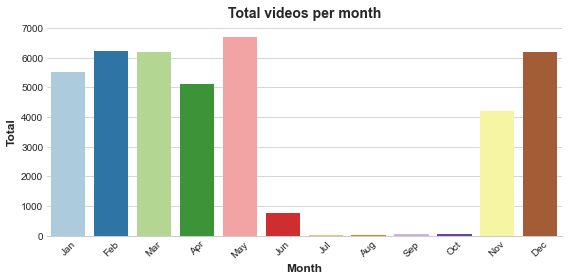

In [18]:
month_df = data.groupby("publish_month").size().reset_index()

month_df["publish_month"] = month_df["publish_month"].map(dict_month)

plt.figure(figsize=(8,4))

sns.barplot(x="publish_month",y=0,data=month_df,palette="Paired",saturation=0.8)
plt.xlabel("Month")
plt.ylabel("Total")
plt.title("Total videos per month")
plt.xticks(rotation=45)
sns.despine(left=True)

### Total viewed videos per Day of week

In [19]:
data.groupby('publish_day_week').sum()['views']

publish_day_week
0    12299195247
1    13938147018
2    13644783188
3    16089783826
4    23622601358
5     6212414738
6    10864844777
Name: views, dtype: int64

<AxesSubplot:xlabel='publish_day_week'>

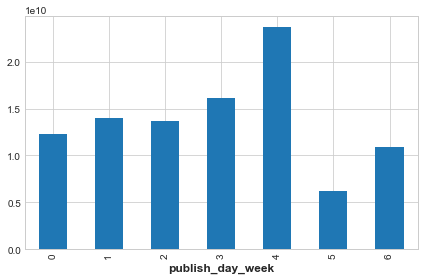

In [20]:
data.groupby('publish_day_week').sum()['views'].plot(kind='bar')

#### Total videos viewed  per month in year

In [21]:
data.groupby('publish_month').sum()['views']

publish_month
1      6123422310
2      8982195957
3     12900761048
4     19828509133
5     32548997203
6      2581414518
7          410195
8         2066029
9          642802
10        4319083
11     5570580118
12     8128451756
Name: views, dtype: int64

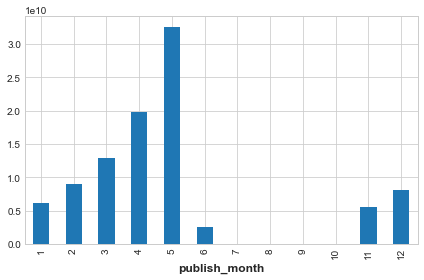

In [26]:
numeros_año = [*range(1,13)]
month = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']

dict_month = {}
for key,item in zip(month,numeros_año):
   dict_month[item] = key

month_df=data.groupby('publish_month').sum()['views'].plot(kind='bar')

#### Number of videos uploaded per Hour

In [28]:
hour=data.groupby('publish_hour').size()
hour

publish_hour
0     1436
1     1318
2      936
3      944
4     1262
5     1253
6      531
7      700
8      790
9      605
10     541
11     856
12    1551
13    2105
14    2807
15    3483
16    3669
17    3447
18    2889
19    2132
20    2136
21    2104
22    1959
23    1495
dtype: int64

Text(0.5, 1.0, 'Number of videos uploaded per hour')

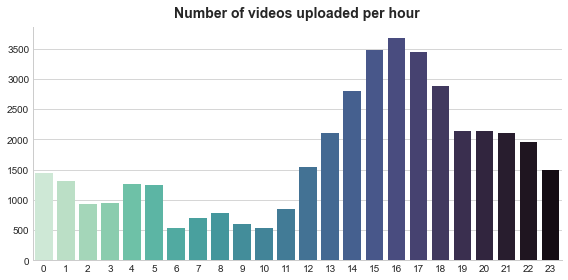

In [31]:
plt.figure(figsize=(8,4))
sns.barplot(x=hour.index.values,y=hour.values,palette="mako_r")
sns.despine()
plt.title("Number of videos uploaded per hour")

In [32]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_day_week,publish_hour,publish_month
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0,17,11
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0,7,11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,6,19,11
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0,11,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,6,18,11


In [33]:
with open('US_category_id.json') as f:
    data_json=json.load(f)['items']

In [35]:

data_json[0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [36]:
#create disk with titles 
title_dict={}
for cat in data_json:
    title_dict[int(cat['id'])]=cat['snippet']['title']

In [ ]:
data['category_id']=data['category_id'].map(title_dict)

In [39]:
categorys=data['category_id'].value_counts(normalize=True).reset_index()
categorys

,index,category_id
0,24,0.243327
1,10,0.158050
2,26,0.101248
3,23,0.084422
4,22,0.078390
5,25,0.060734
6,28,0.058634
7,1,0.057266
8,17,0.053090
9,27,0.040441


In [40]:
# rename columns names
categorys.rename(columns={"index":"Category","category_id":"Percentage"},inplace=True)
# get percentage
categorys["Percentage"] = round(categorys["Percentage"] *100,2)
# we use style background ¡
categorys.style.background_gradient(cmap='mako_r')

,Category,Percentage
0,24,24.330000
1,10,15.810000
2,26,10.120000
3,23,8.440000
4,22,7.840000
5,25,6.070000
6,28,5.860000
7,1,5.730000
8,17,5.310000
9,27,4.040000


In [41]:
# Well, neither one nor the other, I will do better the sum of both, that is, the percentage of like/dislikes by views....
total = data["likes"] + data["dislikes"]

In [42]:
# let's add up the comments.
total_def = data["comment_count"] + total
# we created a new column...percentage iterations per view ¡¡¡
data["percentage_iterations_per_view"] = round((total_def / data["views"]) * 100,2)

In [43]:
def data_views(groupby="channel_title",by="percentage_iterations_per_view",ascending=False):
    """
    return dataframe groupby channels, showing mean from columns:
    "views","likes","dislikes","comment_count","percentage_iterations_per_view"
    ,sort by and ascending included
    """
    return  (data
            .groupby(groupby)["views","likes","dislikes","comment_count","percentage_iterations_per_view"]
            .mean()
            .sort_values(by=by,ascending=ascending)
            )

In [44]:
data_views().head(10)

c:\python37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,dislikes,comment_count,percentage_iterations_per_view
channel_title,,,,,
Daily Caller,1.175780e+06,9.346667e+03,223806.333333,28903.333333,22.290000
Desimpedidos,5.031049e+06,1.017472e+06,3596.333333,78330.000000,22.100000
KickThePj,8.320000e+04,1.526200e+04,26.000000,881.000000,19.430000
Amber Liu,1.545602e+05,2.663280e+04,37.400000,2287.200000,18.942000
HarryStylesVEVO,2.323018e+06,2.699427e+05,3074.833333,15734.833333,18.231667
Scotty Sire,7.399617e+05,1.195365e+05,414.000000,10590.166667,18.075000
Max Joseph,8.953520e+05,1.417310e+05,2413.000000,11279.000000,17.360000
dodieVEVO,3.903665e+05,5.702217e+04,508.333333,4638.250000,17.030000
LouisTomlinsonVEVO,2.495173e+06,3.428858e+05,1713.000000,31226.666667,16.936667


In [45]:
# Which are the channels with more videos in the dataset ?
total_chanel = data.groupby("channel_title")["video_id"].count().sort_values(ascending=False).head(10).reset_index()
total_chanel.rename(columns={"channel_title":"Channel_title","video_id":"Total_videos"},inplace=True)
total_chanel.style.background_gradient(cmap='mako_r')

,Channel_title,Total_videos
0,ESPN,203
1,The Tonight Show Starring Jimmy Fallon,197
2,Vox,193
3,TheEllenShow,193
4,Netflix,193
5,The Late Show with Stephen Colbert,187
6,Jimmy Kimmel Live,186
7,Late Night with Seth Meyers,183
8,Screen Junkies,182
9,NBA,181
